In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import healpy as hp

In [2]:
def radec_to_sph(ra,dc):
    
    theta = (90.-dc)*np.pi/180.
    phi   = ra*np.pi/180.
    return theta, phi

In [3]:
def plot_healpix(NSIDE,ra=None,dc=None,fname=None,coord=None,rot=None,title="",cmin=0,cmax=None,h=None):

    if rot is None:
        rot = [0,0,0]

    if ra is None and h is None:
        print("You need to provide either a list of coordinates or the h histogramed pixel list")
        return

    if h is None:
        #Convert to ra/dec
        theta, phi = radec_to_sph(ra,dc)
        #set up the healpix grid.
        n = hp.ang2pix(NSIDE, theta, phi)
        #Load up the healpix array and display it. 
        h = np.histogram(n,hp.nside2npix(NSIDE),
                         range=(0,hp.nside2npix(NSIDE)-1))[0]
        h = h.astype(np.float64)

    #Transform into a per degree scale.
    npix = hp.nside2npix(NSIDE)
    total_degrees_in_sky = 4.*np.pi*(180./np.pi)**2
    area_per_pixel = total_degrees_in_sky/(1.*npix)
    h /= area_per_pixel

    #Set the maximum density value for the color
    if cmax is None:
        cmax = np.ceil(np.percentile(h,99.9936)) #4 sigma

    hp.mollview(h,title=title.format(NSIDE),rot=rot,coord=coord,
                notext=True,min=cmin,max=cmax)
    hp.visufunc.graticule()
    #hp.projplot(eth,ephi,'w-',coord=coord)
    #hp.projplot(EP_th,EP_phi,'wo',coord=coord)
    #hp.projplot(IDF_th,IDF_phi,'kx',coord=coord)
    if fname is None:
        plt.show(block=True)
    else:
        plt.savefig(fname)

    return h



In [4]:
wide = Table.read("Master_AGN_Catalog.downselected.wide.v1.1.fits")

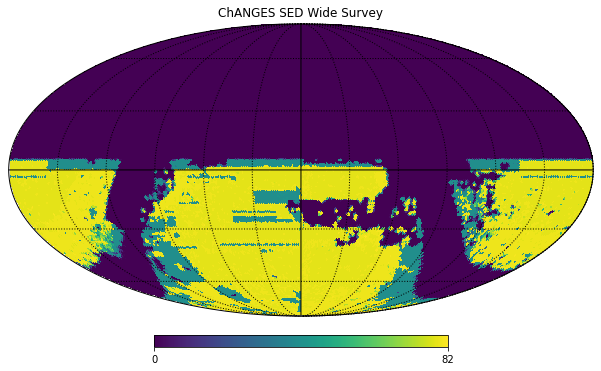

array([ 0.        ,  0.        ,  0.        , ..., 40.51025549,
       40.51025549, 35.74434308])

In [13]:
NSIDE=64
plot_healpix(NSIDE, wide['ra'], wide['dec'], title="ChANGES SED Wide Survey")

In [ ]:
wide = Table.read("Master_AGN_Catalog.downselected.wide.v1.1.fits")